In [29]:
# Decision Tree and Rando Forest Project

In [30]:
# Import the usual libraries for pandas and plotting. You can import sklearn later on

In [31]:
import pandas as pd
import numpy as np

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [33]:
%matplotlib inline

In [34]:
# Get the Data

In [35]:
# Usepandas to read loan_data.csv as a data frame called loans.

In [36]:
loans=pd.read_csv('loan_data.csv')

In [37]:
# Check out the info(),head(),and describe() methods on loans.

In [38]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [39]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [40]:
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [41]:
# Exploratory Data Analysis

In [42]:
# Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome

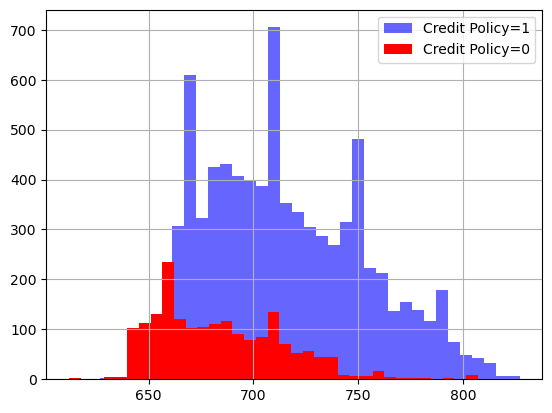

In [43]:
loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue',
                                             label='Credit Policy=1',
                                             alpha=0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35,color='red',
                                              label='Credit Policy=0')
plt.legend()

In [ ]:
# Create a similar figure, except this time select by the not.fully.paid columns.

Text(0.5, 0, 'FICO')

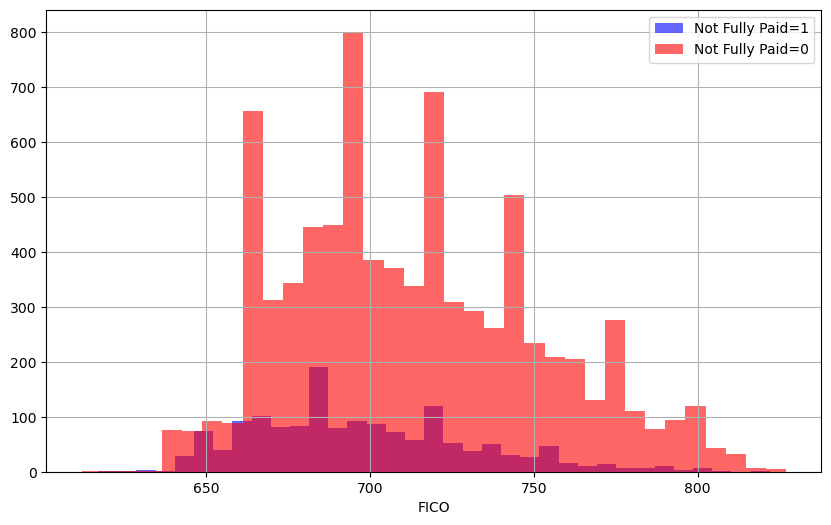

In [46]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35,color='blue',
                                              label='Not Fully Paid=1',
                                              alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35,color='red',
                                              label='Not Fully Paid=0',
                                              alpha=0.6)
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

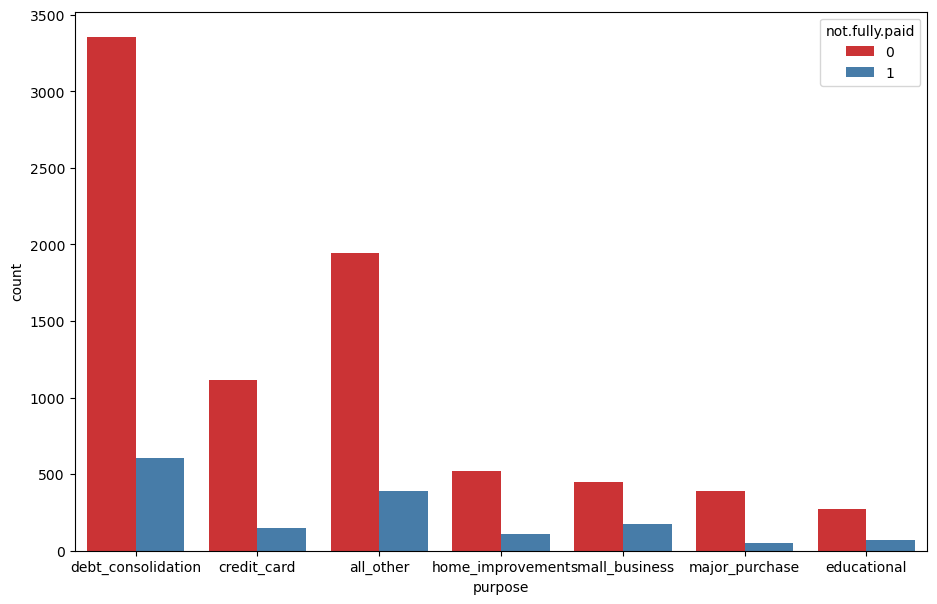

In [48]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

In [50]:
# Let's see the trend between FICo score and interesr rate. Recreate the following jointplot.

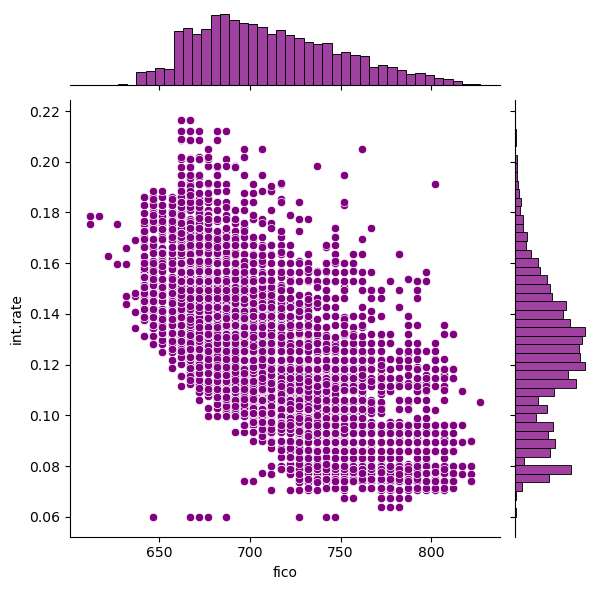

In [51]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

In [52]:
# Create the following implots to see if the trend differed between not.fully.paid and credit.policy.
# Check the documentation for implots() if you can not figure out how to seperate it into columns

C:\Users\filda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1100x700 with 0 Axes>

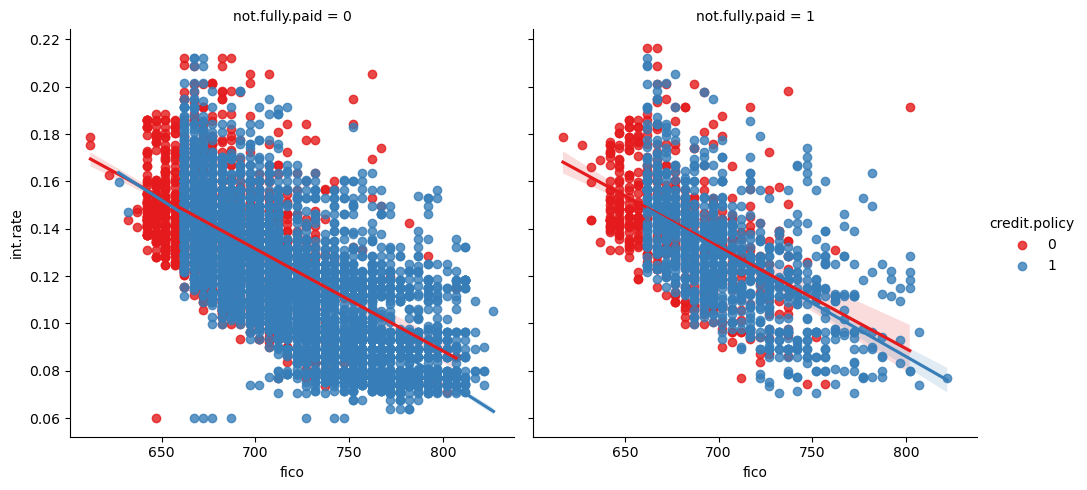

In [60]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [54]:
# Setting up the Data

In [55]:
# Let's get ready to set up our data for our Random Forest Classification Model!
# Check loans.info() again.